# NEURAL NETWORK EMBEDDING TO CLASSIFY CANCER DOCUMENTS
## With and Without Pre-computed GLOVE Word Embeddings from 2014 English Wikipedia

## Dataset downloaded from https://www.kaggle.com/datasets/falgunipatel19/biomedical-text-publication-classification

## Pre-computed GLOVE word embeddings downloaded from https://nlp.stanford.edu/projects/glove. File name is glove.6B.zip (Size 822 MB)

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('alldata_1_for_kaggle.csv', encoding = 'ISO-8859-1', header=0)
data.columns = ['id', 'label', 'text']

In [3]:
data.shape

(7570, 3)

## This is what labels look like

In [4]:
data['label'].unique()

array(['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer'], dtype=object)

## This is what the text looks like

In [5]:
data['text'][0]

"Thyroid surgery in  children in a single institution from Osama Ibrahim Almosallama Ali Aseerib Ahmed Alhumaida Ali S AlZahranic Saif Alsobhib Saud AlShanafeybFrom the  aDepartment of Surgery College of Medicine Qassim University Buraidah Al Qassim Saudi Arabia  bDepartment of Surgery King Faisal Specialist Hospital and Research Center Riyadh Saudi Arabia cDepartment of Medicine King Faisal Specialist Hospital and Research Center Riyadh Saudi Arabia Correspondence   Dr  Osama Ibrahim  Almosallam  Department of  Surgery  College  of  Medicine Qassim  University  PO  Box   Buraidah  Al  Qassim   Saudi  Arabia  osama_iaahotmailcom ORCID orcid0000000290367564        Citation  Almosallam OI Aseeri A Alhumaid A AlZahrani AS Alsobhi S AlShanafey S Thyroid surgery in  children  in  a  single  institution  from   Ann  Saudi  Med         Received January  Accepted May  Published August  Copyright Copyright   Annals of Saudi Medicine Saudi Arabia This is an   access  under the Creative Commons A

In [6]:
data.head(15)

,id,label,text
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
5,5,Thyroid_Cancer,This study was performed to explore the effec...
6,6,Thyroid_Cancer,This study was performed assess the clinical ...
7,7,Thyroid_Cancer,Journal of International Medical Research  Th...
8,8,Thyroid_Cancer,Gastric cancer GC persists as a worldwide pub...
9,9,Thyroid_Cancer,Scars Burns HealingVolume  reuse guideli...


## From above, we see that labels are arranged sequentially. So,we first shuffle the data. This is just a precaution and optional, because in next step when we split train and test data, the split will be random anyways.

In [7]:
data = data.sample(frac=1)

## Separate data into Train (70%) and Test (30%) datasets

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.3, random_state=42)

In [9]:
train_set.shape

(5299, 3)

In [10]:
test_set.shape

(2271, 3)

## Separate the data and labels

In [11]:
x_train = train_set['text'].copy()
y_train = train_set['label'].copy()
x_test = test_set['text'].copy()
y_test = test_set['label'].copy()

## We now perform all computations and model building using x_train and y_train. We will evaluate on x_test and y_test in the end.

## First Preprocess x_train - 
## (1) Tokenize text - (fit on text. This step is done only on x_train and never on x_test), 
## (2) Get sequences,
## (3) Pad sequences

### Although x_train has 204,397 distinct words, we restrict our analysis to only 10,000 words.

In [12]:
max_words = 10000

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)

## Get the word index

In [ ]:
train_word_index = tokenizer.word_index

## Total word count in this entire corpus = 204,397, but we can see above that we have restricted to only 10,000 words

In [16]:
len(train_word_index)

204398

## Max length of all texts

In [17]:
max([len(text) for text in x_train])

32712

## Although, the max length of all texts in x_train is 32,712 words, we restrict it to only 16,000 

In [18]:
max_len = 16000

## Pad train sequences to be of max length of max_len i.e. 16,000

In [19]:
from keras.preprocessing.sequence import pad_sequences

padded_train_sequences = pad_sequences(train_sequences, maxlen = max_len)

In [20]:
padded_train_sequences.shape

(5299, 16000)

In [21]:
padded_train_sequences

array([[   0,    0,    0, ..., 3580,    1,   75],
       [   0,    0,    0, ..., 1727,    7, 1184],
       [   0,    0,    0, ...,    7, 1497,  950],
       ...,
       [   0,    0,    0, ..., 1443, 5555,  425],
       [   0,    0,    0, ...,  650,   22, 3444],
       [   0,    0,    0, ...,  804,  405, 3444]], dtype=int32)

## Now Preprocess y_train. 
## (1) Ordinal encoding to convert textual categories to integers (fit and transform on y_train. fit is done only on y_train and never on y_test. On y_test, we do only transform),
## (2) Categorical encoding to convert integers to 0 and 1  

In [22]:
y_train

6610       Lung_Cancer
3426      Colon_Cancer
2911      Colon_Cancer
375       Colon_Cancer
3906       Lung_Cancer
             ...      
296       Colon_Cancer
3822       Lung_Cancer
6556      Colon_Cancer
5523    Thyroid_Cancer
2896      Colon_Cancer
Name: label, Length: 5299, dtype: object

In [23]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
y_train_encoded = oe.fit_transform(np.array(y_train).reshape(-1,1))

In [24]:
oe.categories_

[array(['Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer'], dtype=object)]

In [25]:
y_train_encoded

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [2.],
       [0.]])

In [26]:
y_train_encoded.shape

(5299, 1)

In [27]:
from keras.utils import to_categorical

y_train_encoded_to_categorical = to_categorical(y_train_encoded)

y_train_encoded_to_categorical

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

## Read pre-computed GLOVE word embeddings

In [28]:
embeddings_index = {}

f = open('./glove.6B/glove.6B.100d.txt') # We read the 100 dimension file.
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [29]:
len(embeddings_index)

400000

In [30]:
embeddings_index['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

## Get the precomputed embeddings for our word_index (of 10,000 words) in a separate matrix
## Each word has precomputed embedding of 100 dimensions, so each word in word_index also will have 100 dimensions

In [31]:
embedding_dim = 100   # 100 dimension because we read the precomputed embeddings of 100 dimensions.

embedding_matrix = np.zeros((max_words, embedding_dim))

for train_word, i in train_word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(train_word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [32]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.1529    , -0.24279   ,  0.89837003, ..., -0.59100002,
         1.00390005,  0.20664001],
       ...,
       [-0.46948001,  0.28255999, -0.078984  , ...,  0.13574   ,
         0.1815    ,  0.47226   ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.31400999,  0.060019  , -0.15218   , ...,  0.088434  ,
        -0.034011  , -0.24336   ]])

In [33]:
embedding_matrix.shape

(10000, 100)

## Build Model

In [34]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

def get_model():
    model = Sequential()

    # Embedding where we want to map 10K max_words to 100 embedding_dim. Each input length is 16K words max_len
    model.add(Embedding(max_words, embedding_dim, input_length = max_len))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

## K-fold Cross Validation

In [35]:
def KFold_CV(model, k, num_epochs, train_data, train_labels):
    num_val_samples = len(x_train)//k
    accuracy_histories = []
    loss_histories = []
    val_accuracy_histories = []
    val_loss_histories = []

    for i in range(k):
        print('Processing fold # ', i)
        val_data   = train_data[ i*num_val_samples : (i+1)*num_val_samples ]
        val_labels = train_labels[ i*num_val_samples : (i+1)*num_val_samples ]
    
        partial_train_data   = np.concatenate([ train_data[: i* num_val_samples] , train_data[(i+1)* num_val_samples : ] ] , axis=0)
        partial_train_labels = np.concatenate([ train_labels[: i* num_val_samples] , train_labels[(i+1)* num_val_samples : ] ] , axis=0)
    
        history = model.fit(partial_train_data, partial_train_labels, validation_data=(val_data, val_labels), epochs=num_epochs)
    
        accuracy_histories.append(history.history['accuracy'])
        loss_histories.append(history.history['loss'])
        val_accuracy_histories.append(history.history['val_accuracy'])
        val_loss_histories.append(history.history['val_loss'])

    return accuracy_histories, loss_histories, val_accuracy_histories, val_loss_histories

## Version 1 - Use precomputed embeddings - so freeze embedding layer of our model so that the pretrained part is not forgotten.

In [36]:
model_with_precomputed_embeddings = get_model()
model_with_precomputed_embeddings.layers[0].set_weights([embedding_matrix])
model_with_precomputed_embeddings.layers[0].trainable = False

In [37]:
acc_h, loss_h, val_acc_h, val_loss_h = KFold_CV(
                                                    model=model_with_precomputed_embeddings, 
                                                    k=3, 
                                                    num_epochs=5, 
                                                    train_data=padded_train_sequences, 
                                                    train_labels=y_train_encoded_to_categorical
                                                )

Processing fold #  0
Epoch 1/5
111/111 [==============================] - 80s 712ms/step - loss: 3.5031 - accuracy: 0.6306 - val_loss: 0.4719 - val_accuracy: 0.6665
Epoch 2/5
111/111 [==============================] - 78s 706ms/step - loss: 0.4838 - accuracy: 0.7849 - val_loss: 1.4994 - val_accuracy: 0.7089
Epoch 3/5
111/111 [==============================] - 77s 696ms/step - loss: 0.5438 - accuracy: 0.8882 - val_loss: 0.5028 - val_accuracy: 0.8975
Epoch 4/5
111/111 [==============================] - 84s 754ms/step - loss: 0.3616 - accuracy: 0.9363 - val_loss: 0.2760 - val_accuracy: 0.9604
Epoch 5/5
111/111 [==============================] - 80s 718ms/step - loss: 0.2896 - accuracy: 0.9680 - val_loss: 0.2113 - val_accuracy: 0.9870
Processing fold #  1
Epoch 1/5
111/111 [==============================] - 78s 704ms/step - loss: 0.2250 - accuracy: 0.9759 - val_loss: 0.2031 - val_accuracy: 0.9813
Epoch 2/5
111/111 [==============================] - 78s 706ms/step - loss: 0.1861 - accuracy:

## Plot Training and Validation Loss and Accuracy

In [38]:
import matplotlib.pyplot as plt

def plot_train_and_val_loss(nrows, ncols, index, single_loss_history, single_val_loss_history):
    epochs = range(1, len(single_loss_history)+1)
    plt.subplot(nrows, ncols, index)
    plt.plot(epochs, single_loss_history, 'bo', label = 'Training Loss')
    plt.plot(epochs, single_val_loss_history, 'b', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

def plot_train_and_val_acc(nrows, ncols, index, single_acc_history, single_val_acc_history):
    epochs = range(1, len(single_acc_history)+1)
    plt.subplot(nrows, ncols, index)
    plt.plot(epochs, single_acc_history, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, single_val_acc_history, 'b', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

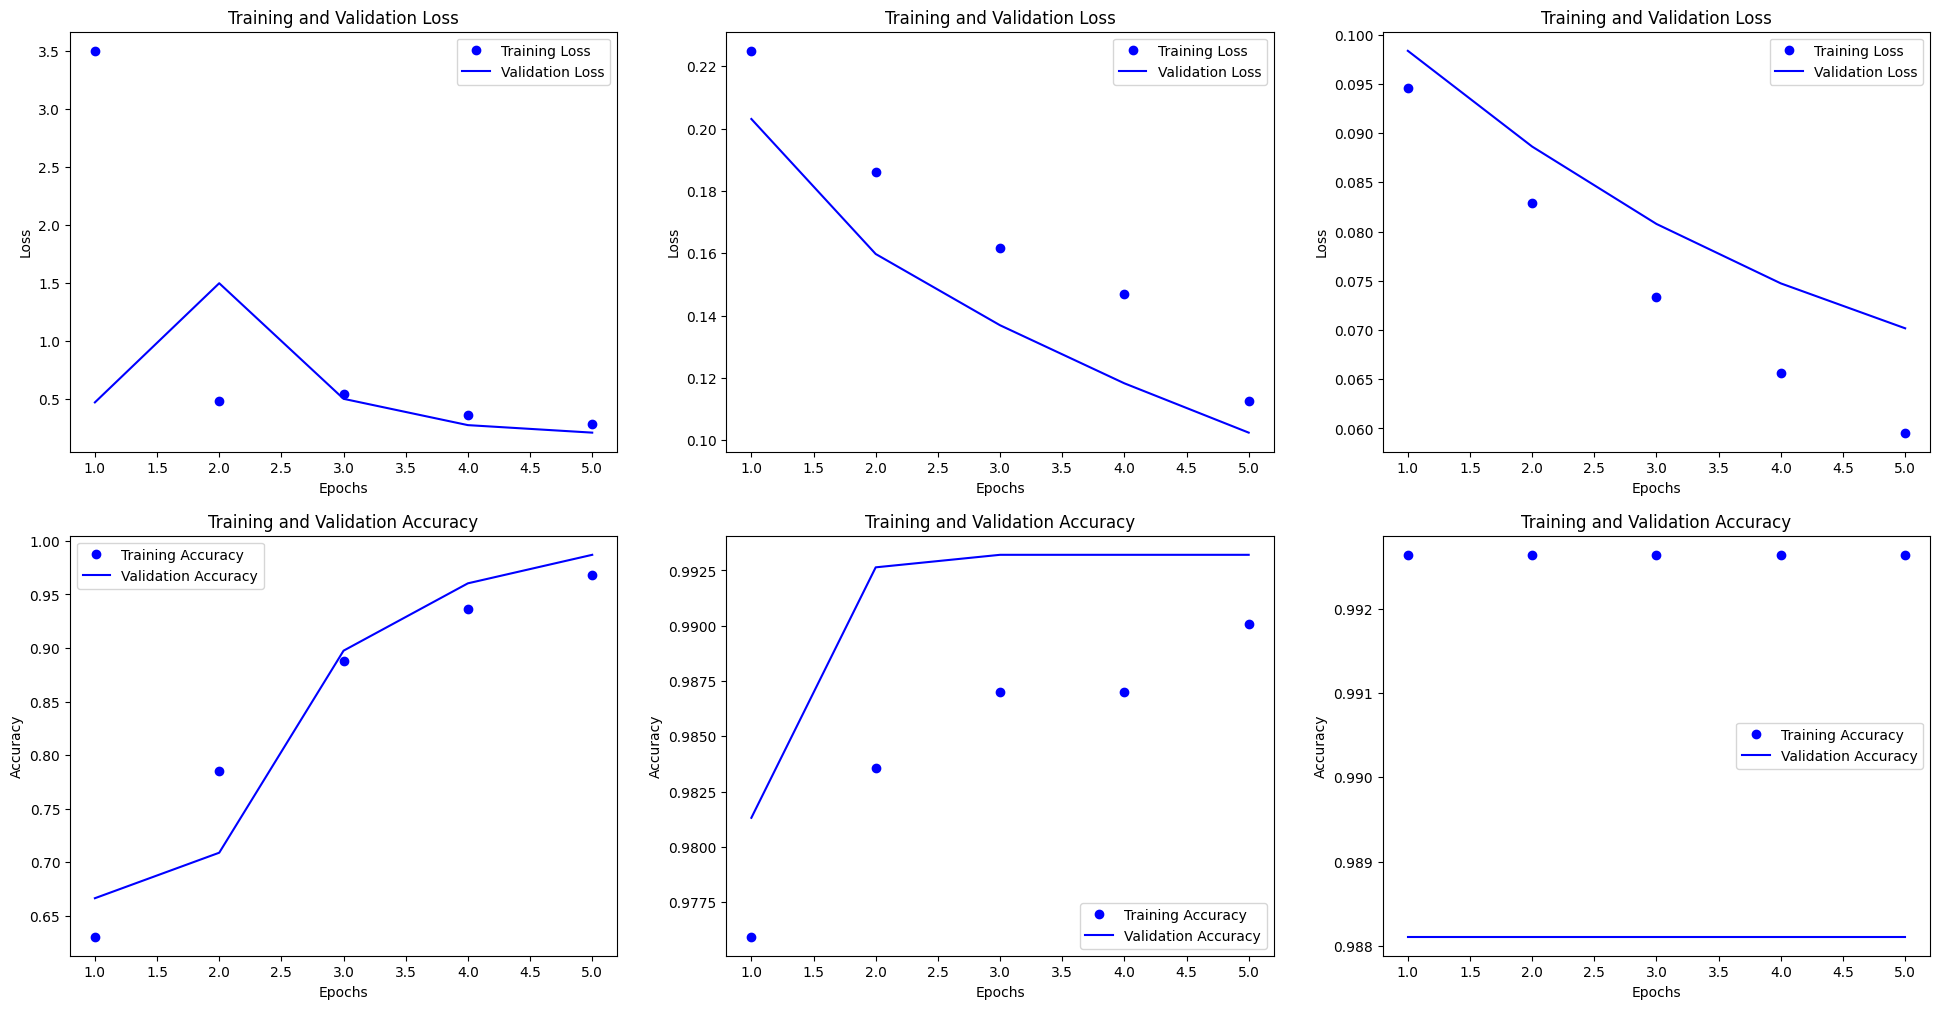

In [39]:
plt.figure(figsize=(24, 12))
plot_train_and_val_loss(2, 3, 1, loss_h[0], val_loss_h[0])
plot_train_and_val_loss(2, 3, 2, loss_h[1], val_loss_h[1])
plot_train_and_val_loss(2, 3, 3, loss_h[2], val_loss_h[2])

plot_train_and_val_acc(2, 3, 4, acc_h[0], val_acc_h[0])
plot_train_and_val_acc(2, 3, 5, acc_h[1], val_acc_h[1])
plot_train_and_val_acc(2, 3, 6, acc_h[2], val_acc_h[2])

plt.show()

### In above plot, there are 3 columns - one for each fold. Each column has 2 rows - one for training and validation loss and the other for training and validation accuracy. We can see, that as the epochs increase, loss decreases and accuracy increases. This is where we would spend most of our time playing with different options depending on whether model is overfitting or underfitting - ex: complexity of the model, regularization, dropout and changing epochs.

## Evaluate the model on Test data

### Preprocess x_test 
### (1) Tokenize x_test and get sequences (Don't call fit. Just call texts_to_sequences()),
### (2) Pad sequences

In [40]:
test_sequences = tokenizer.texts_to_sequences(x_test)
padded_test_sequences = pad_sequences(test_sequences, maxlen = max_len)
padded_test_sequences

array([[   0,    0,    0, ...,   42,   87, 2433],
       [   0,    0,    0, ...,    4,   89,  141],
       [   0,    0,    0, ...,    2,  333,   31],
       ...,
       [   0,    0,    0, ...,   63,   66,  749],
       [   0,    0,    0, ..., 3755,   59,  171],
       [   0,    0,    0, ..., 1589,    3, 3444]], dtype=int32)

### Preprocess y_test
### (1) Ordinal encode (Don't call fit. Just call transform())
### (2) Categorical encode

In [41]:
y_test_encoded = oe.transform(np.array(y_test).reshape(-1,1))
y_test_encoded_to_categorical = to_categorical(y_test_encoded)
y_test_encoded_to_categorical

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

### Evaluate on test data - We get Accuracy = 99.2%

In [42]:
model_with_precomputed_embeddings.evaluate(padded_test_sequences, y_test_encoded_to_categorical)

71/71 [==============================] - 6s 88ms/step - loss: 0.0589 - accuracy: 0.9921


[0.0589086078107357, 0.9920739531517029]

## Version 2 - Train same model design but without precomputed word embeddings. So embeddings will be computed by looking at our dataset.

In [43]:
model_without_precomputed_embeddings = get_model()

acc_h, loss_h, val_acc_h, val_loss_h = KFold_CV(
                                                    model=model_without_precomputed_embeddings, 
                                                    k=3, 
                                                    num_epochs=5, 
                                                    train_data=padded_train_sequences, 
                                                    train_labels=y_train_encoded_to_categorical
                                                )

Processing fold #  0
Epoch 1/5
111/111 [==============================] - 92s 829ms/step - loss: 4.5245 - accuracy: 0.7903 - val_loss: 0.0549 - val_accuracy: 0.9926
Epoch 2/5
111/111 [==============================] - 89s 804ms/step - loss: 0.1029 - accuracy: 0.9881 - val_loss: 0.0175 - val_accuracy: 0.9938
Epoch 3/5
111/111 [==============================] - 84s 753ms/step - loss: 0.0139 - accuracy: 0.9946 - val_loss: 0.0469 - val_accuracy: 0.9921
Epoch 4/5
111/111 [==============================] - 84s 757ms/step - loss: 0.0129 - accuracy: 0.9949 - val_loss: 0.0132 - val_accuracy: 0.9915
Epoch 5/5
111/111 [==============================] - 88s 796ms/step - loss: 0.0094 - accuracy: 0.9958 - val_loss: 0.0129 - val_accuracy: 0.9932
Processing fold #  1
Epoch 1/5
111/111 [==============================] - 86s 770ms/step - loss: 0.0101 - accuracy: 0.9963 - val_loss: 0.0065 - val_accuracy: 0.9966
Epoch 2/5
111/111 [==============================] - 80s 716ms/step - loss: 0.0077 - accuracy:

## Plot Training and Validation Loss and Accuracy

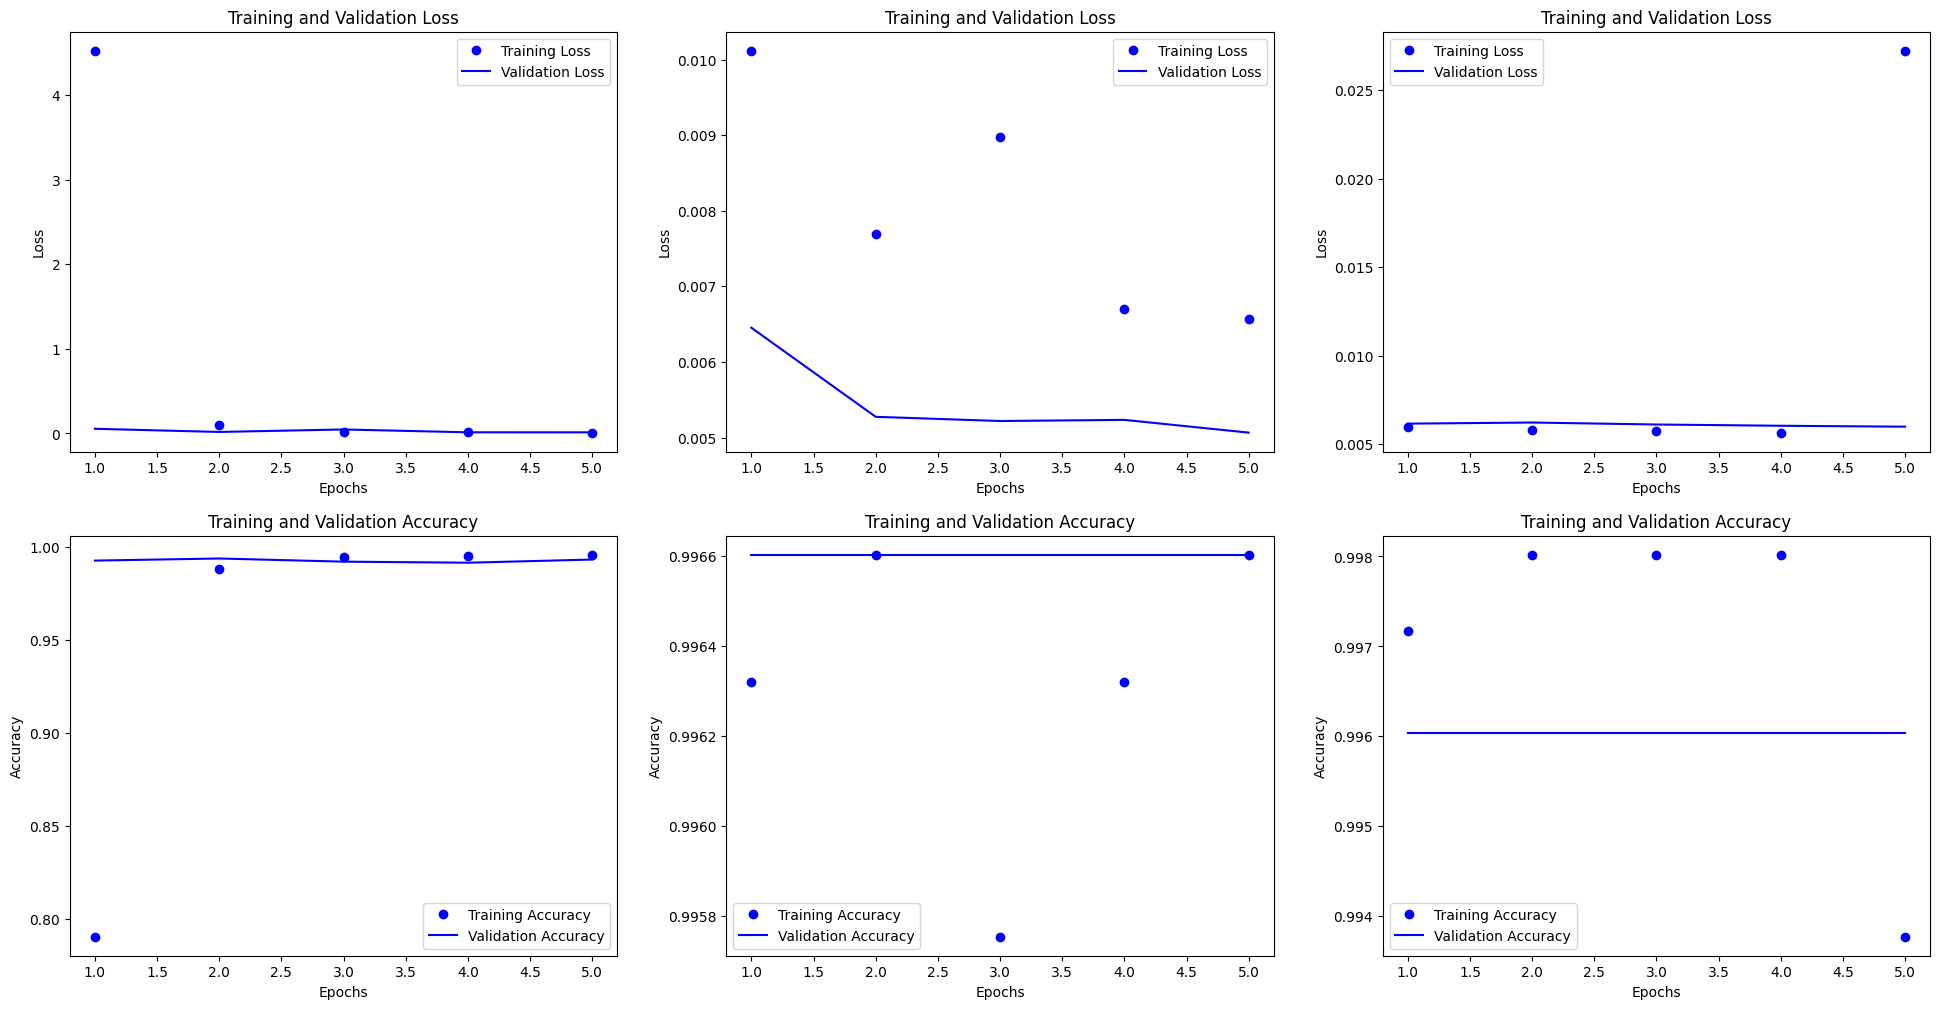

In [44]:
plt.figure(figsize=(24, 12))
plot_train_and_val_loss(2, 3, 1, loss_h[0], val_loss_h[0])
plot_train_and_val_loss(2, 3, 2, loss_h[1], val_loss_h[1])
plot_train_and_val_loss(2, 3, 3, loss_h[2], val_loss_h[2])

plot_train_and_val_acc(2, 3, 4, acc_h[0], val_acc_h[0])
plot_train_and_val_acc(2, 3, 5, acc_h[1], val_acc_h[1])
plot_train_and_val_acc(2, 3, 6, acc_h[2], val_acc_h[2])

plt.show()

## Evaluate on test data - We get Accuracy = 99.73%

In [45]:
model_without_precomputed_embeddings.evaluate(padded_test_sequences, y_test_encoded_to_categorical)

71/71 [==============================] - 6s 82ms/step - loss: 0.0035 - accuracy: 0.9974


[0.0034538148902356625, 0.997357964515686]

## Final comments - 
## Our 2 models - one with and one without precomputed word embeddings - perform with very similar accuracy (albeit the one without precomputed embeddings performing slightly better). This can be attributed to the fact that our train dataset is large enough with 5,299 samples. It is seen that when there are very few samples, models using precomputed word embeddings perform much better. 
## It is very encouraging to see that - despite using only 10,000 words out of 204,397 words and only 16,000 maximum length of document out of possibly 32,712 length - we still get such high accuracy numbers.